## 0. Import Required Libraries

In [160]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report

In [138]:
df = pd.read_csv("../data/featured/featured_data.csv")
df.head()

,question_id,attempts,success_rate,avg_time,median_time,time_std,log_attempts,time_skew,relative_time_variance,success_z,time_z,difficulty,difficulty_class
0,q1,20,0.900000,20.650000,19.0,8.493186,3.044522,1.650000,0.411292,1.061437,-0.422196,-1.483633,Easy
1,q10,89,0.359551,23.213483,23.0,5.142231,4.499810,0.213483,0.221519,-2.213028,-0.166967,2.046061,Hard
2,q100,24,1.000000,18.750000,19.0,3.010850,3.218876,-0.250000,0.160579,1.667315,-0.611367,-2.278682,Easy
3,q10000,22,0.545455,33.772727,27.0,19.306875,3.135494,6.772727,0.571671,-1.086676,0.884349,1.971025,Hard
4,q10002,16,0.625000,31.937500,27.0,19.464391,2.833213,4.937500,0.609453,-0.604728,0.701627,1.306355,Hard


## 2. Define Target Variable

We choose classification as it is more interpretable
for educational difficulty analysis.

Target column:

In [139]:
y = df['difficulty_class']

## 3. Remove Columns That Cause Leakage or Overfitting

The following columns are removed intentionally:

+ Identifiers

+ Target construction components

+ Target columns

In [140]:
X = df.drop(
    columns=[
        'question_id',
        'success_rate',
        'avg_time',
        'success_z',
        'time_z',
        'difficulty',
        'difficulty_class'
    ]
)


## 4. Select Final Feature Set

Remaining features describe question behavior only:

In [141]:
X = X[
    [
        'attempts',
        'log_attempts',
        'median_time',
        'time_std',
        'time_skew',
        'relative_time_variance'
    ]
]


## 5. Encode Target Labels

In [142]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

## 6. Train / Test Split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


## 7. Model 1: Logistic Regression (Baseline)

In [144]:
lr = LogisticRegression(
    max_iter=1000,
    multi_class='auto'
)

lr.fit(X_train, y_train)


d:\Programs\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto')

#### Evaluation

In [145]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       536
           1       0.88      0.86      0.87       536

    accuracy                           0.87      1072
   macro avg       0.87      0.87      0.87      1072
weighted avg       0.87      0.87      0.87      1072



## 8. Model 2: Random Forest Classifier

In [146]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=10,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=8, min_samples_leaf=10, n_estimators=300,
                       random_state=42)

#### Evaluation

In [147]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       536
           1       0.88      0.86      0.87       536

    accuracy                           0.87      1072
   macro avg       0.87      0.87      0.87      1072
weighted avg       0.87      0.87      0.87      1072



## 9. Model 3: Gradient Boosting Classifier

In [148]:
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

#### Evaluation

In [149]:
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Results")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Results
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       536
           1       0.88      0.88      0.88       536

    accuracy                           0.88      1072
   macro avg       0.88      0.88      0.88      1072
weighted avg       0.88      0.88      0.88      1072



In [150]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb
}

for model_name, y_pred in models.items():
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.869403,0.869588,0.869403,0.869387
1,Random Forest,0.870336,0.870492,0.870336,0.870322
2,Gradient Boosting,0.875933,0.875934,0.875933,0.875933


### Cross-Validation (Best Model)

Cross-validation ensures the model generalizes beyond the test split.

In [159]:
cv_scores = cross_val_score(
    gb,
    X,
    y_encoded,
    cv=5,
    scoring='f1_weighted'
)

print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1 score:", cv_scores.mean())


Cross-validation F1 scores: [0.84139999 0.75067274 0.82582856 0.92131755 0.86546999]
Mean CV F1 score: 0.8409377654252731


### Feature Importance

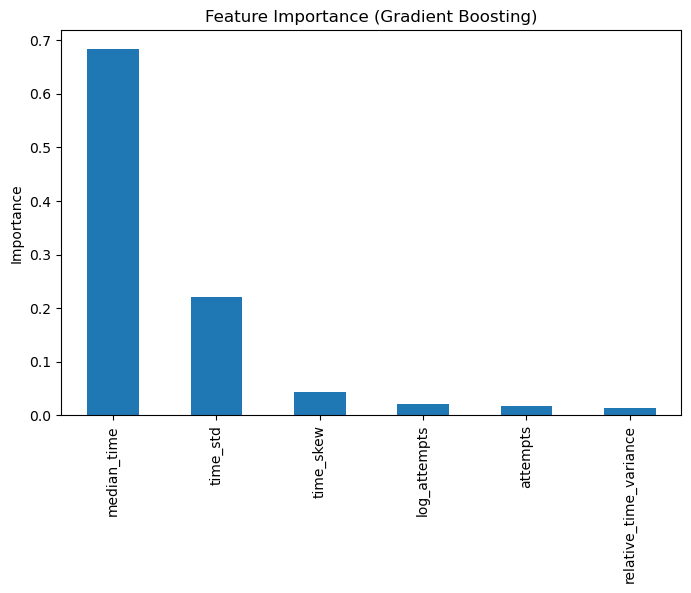

In [157]:
importances = pd.Series(
    gb.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.plot(kind='bar')
plt.title("Feature Importance (Gradient Boosting)")
plt.ylabel("Importance")
plt.show()


In [161]:
joblib.dump(gb, "../models/difficulty_model.pkl")

['../models/difficulty_model.pkl']